In [1]:
import os
cd = os.getcwd()
print(cd)

c:\Users\user\Desktop\KPC\12.opencv


In [2]:
import cv2
import sys
print(cv2.__version__)

4.4.0


* 이미지 파일 불러오기, 예외처리

In [4]:
img = cv2.imread('image/cup.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("img load failed")
    sys.exit()

cv2.namedWindow('image')
cv2.imshow('image',img)
key = cv2.waitKey(2000)

while True:
    if cv2.waitKey() == ord('x'):
        break
print(key)#tap : 9, enter : 13, esc = 27
cv2.destroyAllWindows()

-1


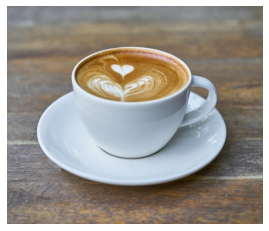

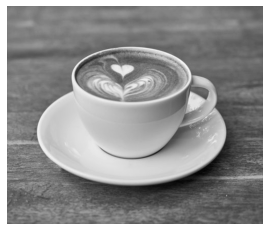

In [5]:
import matplotlib.pyplot as plt
img = cv2.imread('image/cup.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if img is None:
    print("img load failed")
    sys.exit()

#눈금제거
plt.axis('off')
plt.imshow(img)
plt.show()


img2 =cv2.imread('image/cup.jpg',cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(img2, cmap='gray')
plt.show()


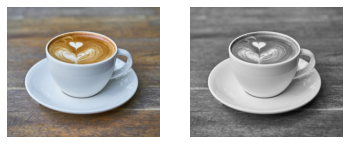

In [14]:
img = cv2.imread('image/cup.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 =cv2.imread('image/cup.jpg',cv2.IMREAD_GRAYSCALE)

plt.subplot(121), plt.axis("off"), plt.imshow(img)
plt.subplot(122), plt.axis("off"), plt.imshow(img2, cmap = 'gray')

plt.show()


In [1]:
import glob, os, sys, cv2
img_files = glob.glob('.\\image\\*.jpg')

if not img_files:
    print('there are not "images" folder')
    sys.exit()

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cnt = len(img_files)
idx = 0

while True:
    img = cv2.imread(img_files[idx])

    if img is None:
        print('lmage load failed')
        break
    cv2.imshow('image', img)
    if cv2.waitKey(1000) >= 0:
        break
    idx+=1
    if idx>=cnt:
        idx = 0
cv2.destroyAllWindows()

In [4]:
import sys,cv2

img1 = cv2.imread('image/cup.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image/cup.jpg', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    print('img load failed')
    sys.exit()
x=40
y=50
img1[y,x] = 0
img2[y,x] =(0,0,255)
print('type(img1): ', type(img1))
print('type(img2): ', type(img2))
print('img1.shape: ', img1.shape)
print('img2.shape: ', img2.shape)
print('img1.dtpye: ', img1.dtype)
print('img2.dtpye: ', img2.dtype)

type(img1):  <class 'numpy.ndarray'>
type(img2):  <class 'numpy.ndarray'>
img1.shape:  (426, 500)
img2.shape:  (426, 500, 3)
img1.dtpye:  uint8
img2.dtpye:  uint8


In [5]:
import sys,cv2

img1 = cv2.imread('image/cup.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image/cup.jpg', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    print('img load failed')
    sys.exit()

img1[:,:] = 0
img2[:,:] =(0,255,255)


cv2.imshow('1',img1)
cv2.imshow('2',img2)
while True:
    if cv2.waitKey() == 27:
        break
cv2.destroyAllWindows()


In [2]:
h, w =img1.shape[:2]
print(f"img1 size: {w} X {h}")
h, w =img2.shape[:2]
print(f"img2 size: {w} X {h}")

if len(img1.shape) ==2:
    print("img1 is a grayscale")
if img1.ndim == 2:
    print('aaa')
if len(img2.shape) == 3:
    print("img2 is a truecolor image")

img1 size: 500 X 426
img2 size: 500 X 426
img1 is a grayscale
aaa
img2 is a truecolor image


In [3]:
# for y in range(h):
#     for x in range(w):
#         img1[y,x] =255
#         img2[y,x] = (0,0,255)

img1[:,:] = 0
img2[:,:] = (0,255,255)

cv2.imshow('1',img1)
cv2.imshow('2',img2)
cv2.waitKey()
cv2.destroyAllWindows()

** 영상 생성

In [17]:
import numpy as np
import cv2

img1 = np.empty((240,320), dtype=np.uint8)
img2 = np.zeros((240,320,3), dtype=np.uint8)
img3 = np.ones((240,320), dtype=np.uint8)
img4 = np.ones((240,320), dtype=np.uint8) * 255
img5 = np.full((240,320,3), 128, dtype=np.uint8)
img6 = np.full((240,320,3),(0,255,255), dtype=np.uint8)

images = [img1,img2,img3,img4,img5,img6]
for i,x in enumerate(images):
    cv2.imshow('img'+str(i),x)
cv2.waitKey()
cv2.destroyAllWindows()

* 복사하는 법<br>
```
img = cv2.imread(...)
img2 = img 
img3 = img.copy()

img[:,:] = (0,255,255)

cv2.imshow
```
라고하면 img2도 같이 바뀌므로 서로 영향을 주지 않으려면 .copy()를 이용하자

* 마스크 연산 , ROI(Region of Interest) <br><br>
```cv2.copyTo(src,mask,dst=None) -> dst```<br>
src : 입력 영상<br>
mask : mask 영상/ uint8/ 0이 아닌 픽셀에 대해서만 복사 연산<br>
dst : 출력 영상. 만약 크기 및 타입이 같은 dst를 입력으로 지정하면 dst를 새로 생성하지 않고 연산 수행.<br>
그렇지 않으면 dst를 새로 생성하여 연산 수행 후 반환

In [21]:
#포토샵같은데에서 마스크연산을 한 파일을 가지고 옴
import os, sys, cv2

src =cv2.imread('./image/airplane.bmp', cv2.IMREAD_COLOR)
mask =cv2.imread('./image/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst =cv2.imread('./image/field.bmp', cv2.IMREAD_COLOR)


if src is None or mask is None or dst is None:
    print('fail')
    sys.exit()

cv2.copyTo(src,mask,dst)
img4 = cv2.copyTo(src,mask)
cv2.imshow('img',img4)
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('mask',mask)
cv2.waitKey()
cv2.destroyAllWindows()


In [55]:
import numpy as np
import cv2
img = np.full((400,400,3),255, np.uint8)
cv2.line(img, (50,50),(200,50),(0,0,255), 5)
cv2.line(img, (50,60),(150,160),(0,0,128))

cv2.rectangle(img, (50, 200,150,100), (0,255,0),2)
cv2.rectangle(img, (70, 220),(180,280), (0,128,0),-1)

cv2.circle(img,(300,100),30,(255,255,0), -1 , cv2.LINE_8)
cv2.circle(img, (300,100),60,(255,0,0),3,cv2.LINE_AA)

pts = np.array([[250,200],[300,200],[350,300],[250,300]])
cv2.polylines(img,[pts],True,(255,0,255),2)
text = "hello? opencv" + cv2.__version__
cv2.putText(img,text,(50,350), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('1',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [58]:
import numpy as np
import cv2
img = cv2.imread('./image/cup.jpg',cv2.IMREAD_COLOR)
cv2.namedWindow('1', cv2.WINDOW_NORMAL)

cv2.rectangle(img, (10,10), (200,50), (0,0,255),-1)
cv2.rectangle(img, (210,40), (250,60), (0,255,0),5)
cv2.circle(img, (270,100),40,(0,255,255),-1)
cv2.putText(img,'latte',(180,400),cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (255,255,255), 1, cv2.LINE_AA)
cv2.line(img, (180,410),(330,410),(255,0,0),3)
cv2.imshow('1',img)
cv2.waitKey()
cv2.destroyAllWindows()